<a href="https://colab.research.google.com/github/Char1ssa/Project-to-predict-data-scientist-s-salaries/blob/main/Copy_of_Data_Scientists_Salary_(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2023 Data Scientist's Salaries**📊

This dataset contains 11 columns regarding the salaries earned by different data scientists. It also shows their job title, the salary converted into USD and the currency the salary was originally in, their type of employment, their experience level, which country they live in as well as information about their respective company and etc.It provides insights towards the factors that contribute towards salaries in the data science field and allows for exploration of relationships between variables.:

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.4 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252723 sha256=2420f240d60261c552c21ac3293148bb1b55f20c108e66f5d0c65606f7f23530
  Stored in directory: /root/

In [ ]:
!pip install fasteda

  Preparing metadata (setup.py) ... done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4723 sha256=39675c42f0e15b625ad54a6a6c26757f6eba731f8abbbcae569d2ebe0b676dd8
  Stored in directory: /root/.cache/pip/wheels/ed/08/72/0d0ec0d3927d227b38ce9542ec3fa6b975c2e17ad0d046dcee
Successfully built fasteda


In [ ]:
!pip install country_converter --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 789.5 kB/s eta 0:00:00


In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import country_converter as coco
import plotly.graph_objects as go
from dataprep.eda import create_report
from fasteda import fast_eda
from sklearn import decomposition, datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#imports files from external file
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
    name=fn, length=len(uploaded[fn])))

  #reads file and prints it
  df = pd.read_csv("ds_salaries.csv")
  print(df)

  #view shape of data
  #the rows and the columns
  print(df.shape)
  display(df.head())
  display(df.describe(include='all'))

Saving ds_salaries.csv to ds_salaries.csv
User uploaded file "ds_salaries.csv" with length 213832 bytes
      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE      

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

work_year experience_level employment_type      job_title  \
count   3755.000000             3755            3755           3755   
unique          NaN                4               4             93   
top             NaN               SE              FT  Data Engineer   
freq            NaN             2516            3718           1040   
mean    2022.373635              NaN             NaN            NaN   
std        0.691448              NaN             NaN            NaN   
min     2020.000000              NaN             NaN            NaN   
25%     2022.000000              NaN             NaN            NaN   
50%     2022.000000              NaN             NaN            NaN   
75%     2023.000000              NaN             NaN            NaN   
max     2023.000000              NaN             NaN            NaN   

              salary salary_currency  salary_in_usd employee_residence  \
count   3.755000e+03            3755    3755.000000               3755   
unique           NaN              20            NaN                 78   
top              NaN             USD            NaN                 US   
freq             NaN            3224            NaN               3004   
mean    1.906956e+05             NaN  137570.389880                NaN   
std     6.716765e+05             NaN   63055.625278                NaN   
min     6.000000e+03             NaN    5132.000000                NaN   
25%     1.000000e+05             NaN   95000.000000                NaN   
50%     1.380000e+05             NaN  135000.000000                NaN   
75%     1.800000e+05             NaN  175000.000000                NaN   
max     3.040000e+07             NaN  450000.000000                NaN   

        remote_ratio company_location company_size  
count    3755.000000             3755         3755  
unique           NaN               72            3  
top              NaN               US            M  
freq             NaN             3040         3153  
mean       46.271638              NaN          NaN  
std        48.589050              NaN          NaN  
min         0.000000              NaN          NaN  
25%         0.000000              NaN          NaN  
50%         0.000000              NaN          NaN  
75%       100.000000              NaN          NaN  
max       100.000000              NaN          NaN

# 1. **Exploratory data analysis**

In [ ]:
#the info() shows all information about the data
#can view data types and total count for each row
#also checks if data contains null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


I used info() to check if there were any null values in the data set that I had to deal with, along with the data type of each variable. No missing values have been noted due to the "non-null count" in the output confirming all rows and columns have no missing values.

In [ ]:
#checks if there are any null values in the dataset
df.isnull().values.any()

False

In [ ]:
#another method to check for empty or NaN values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

This confirms that our data set has no missing values.

In [ ]:
#initial exploration of data
df.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

In [ ]:
#organises data by work_year in descending order to allow viewing of newer data first
sorted_df=df.sort_values(by='work_year', ascending = False)
sorted_df

work_year experience_level employment_type                  job_title  \
0          2023               SE              FT   Principal Data Scientist   
1130       2023               SE              FT  Machine Learning Engineer   
1213       2023               SE              FT               Data Analyst   
1212       2023               SE              FT              Data Engineer   
1211       2023               SE              FT              Data Engineer   
...         ...              ...             ...                        ...   
183        2020               EX              FT         Staff Data Analyst   
3683       2020               SE              FT          Big Data Engineer   
3682       2020               EN              FT              Data Engineer   
3681       2020               MI              FT               Data Analyst   
3576       2020               EN              PT                ML Engineer   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847                 ES           100   
1130   150000             USD         150000                 US           100   
1213   227000             USD         227000                 US             0   
1212   170000             USD         170000                 US             0   
1211   230000             USD         230000                 US             0   
...       ...             ...            ...                ...           ...   
183     15000             USD          15000                 NG             0   
3683   100000             EUR         114047                 PL           100   
3682  4450000             JPY          41689                 JP           100   
3681     8000             USD           8000                 PK            50   
3576    14000             EUR          15966                 DE           100   

     company_location company_size  
0                  ES            L  
1130               US            M  
1213               US            M  
1212               US            M  
1211               US            M  
...               ...          ...  
183                CA            M  
3683               GB            S  
3682               JP            S  
3681               PK            L  
3576               DE            S  

[3755 rows x 11 columns]

DataFrame Head:


work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S

DataFrame Tail:


work_year experience_level employment_type              job_title  \
3752       2020               EN              FT         Data Scientist   
3753       2020               EN              CT  Business Data Analyst   
3754       2021               SE              FT   Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size  
3752               US            S  
3753               US            L  
3754               IN            L

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(3755, 11)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4),

----------------------------------------------------------------------------------------------------
DataFrame Correlation:



/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:127: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "Spectral", linewidths = 2, linecolor = "#000000", fmt='.2f')


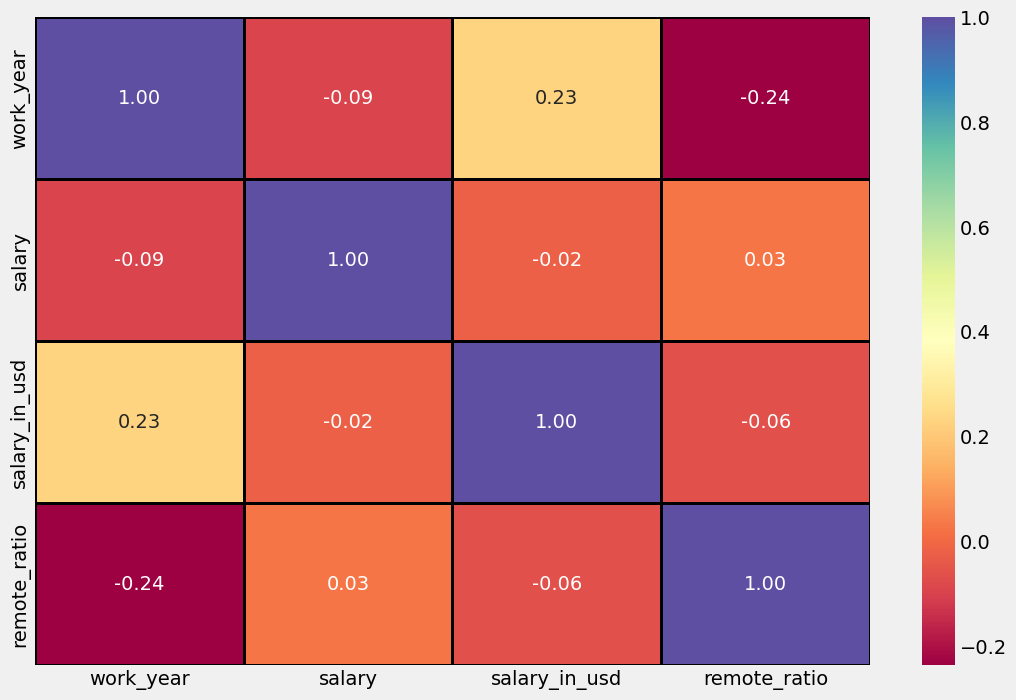

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



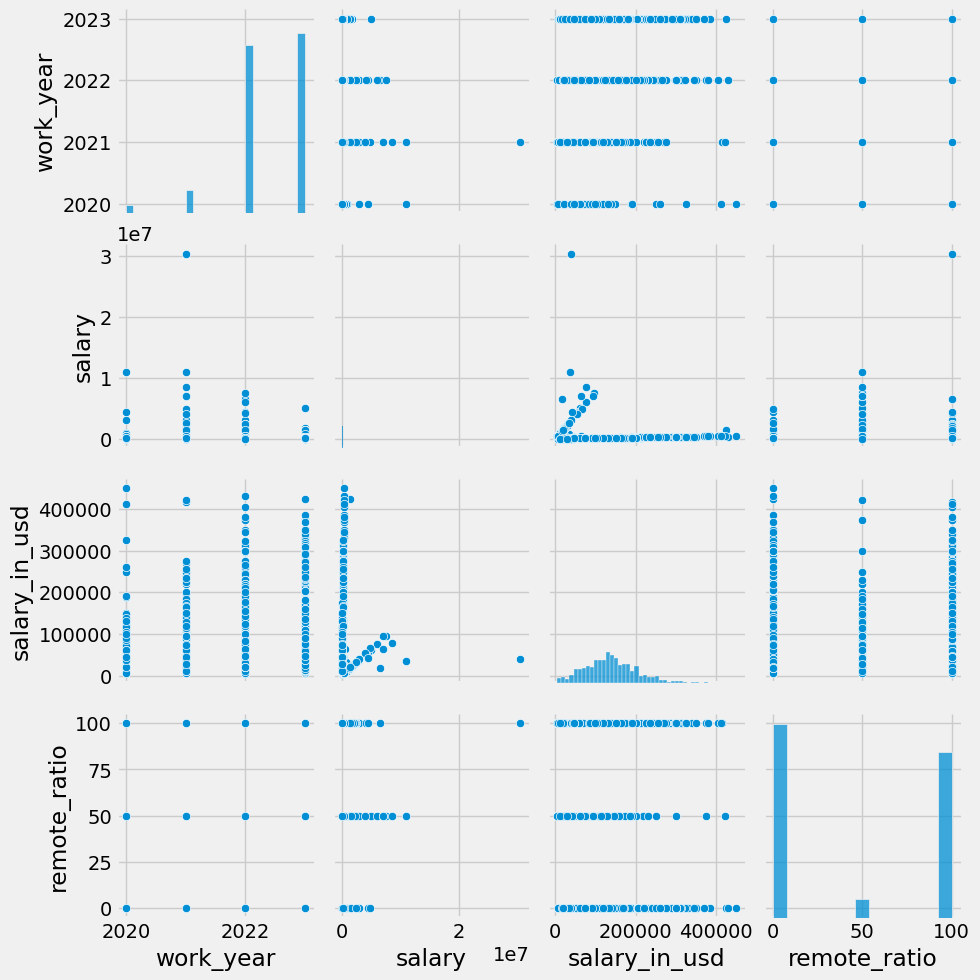

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



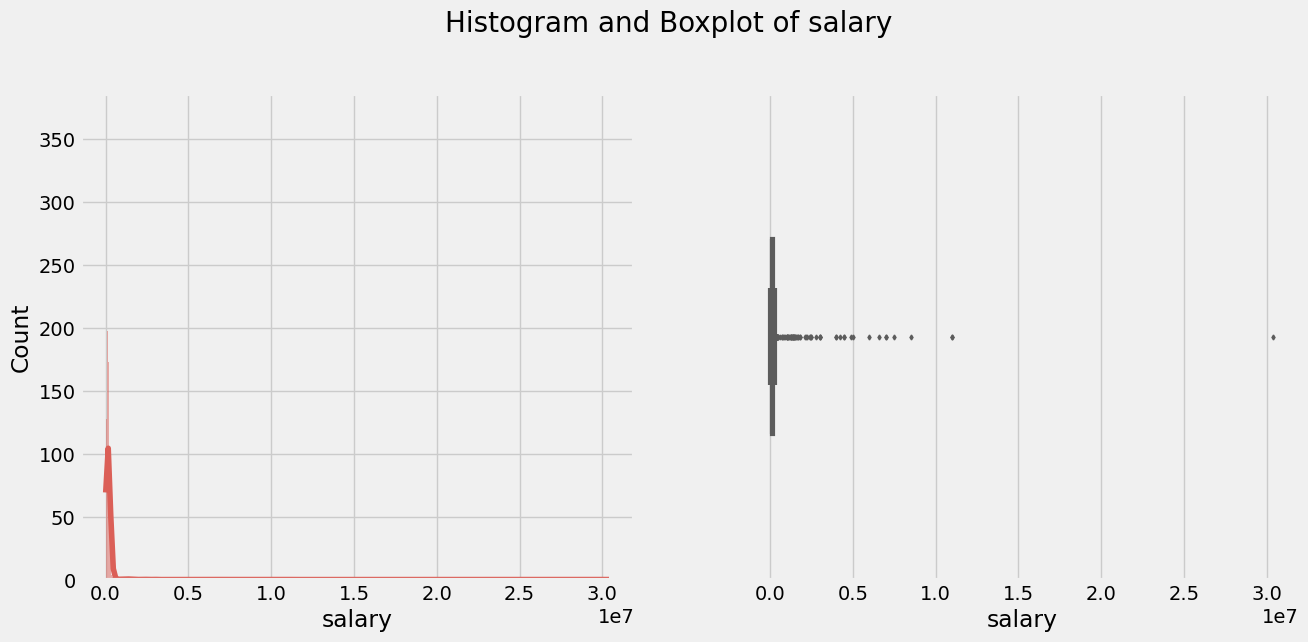

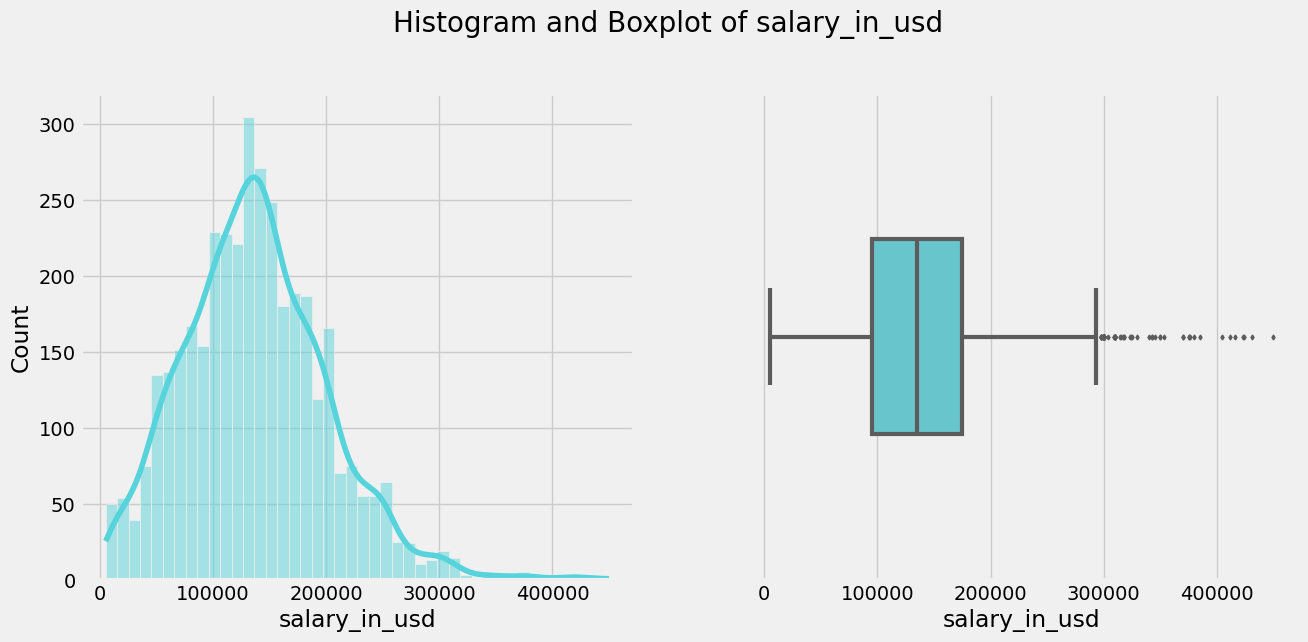

----------------------------------------------------------------------------------------------------
Countplot(s):



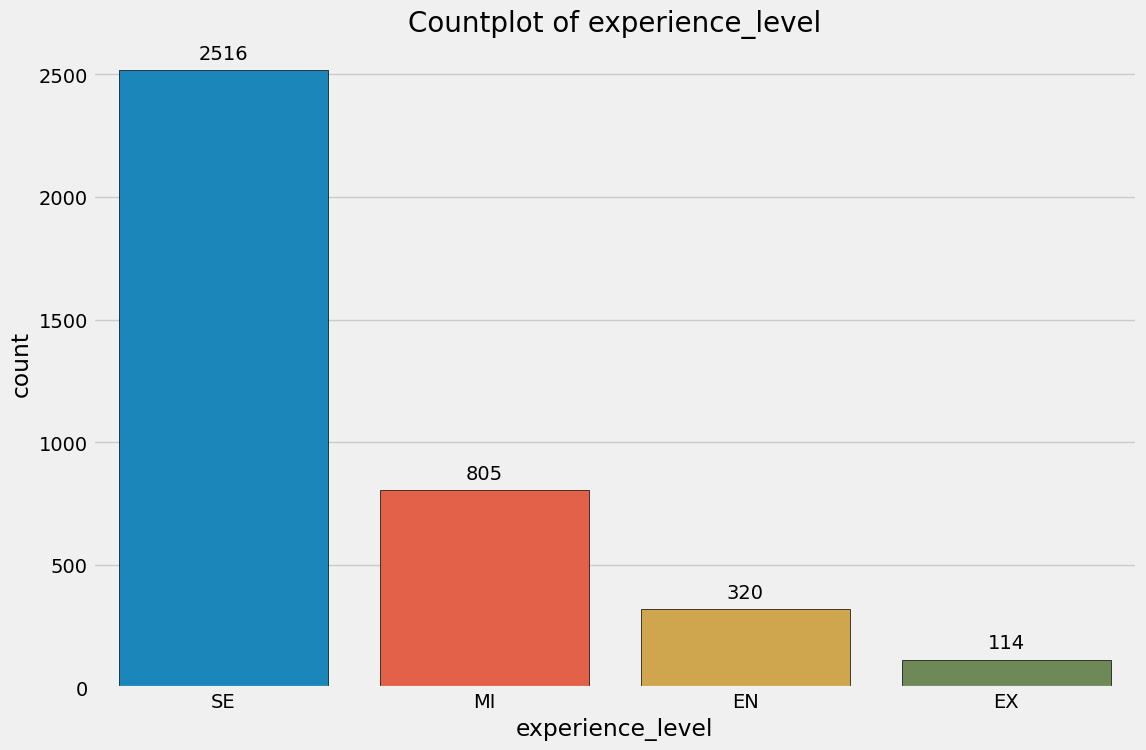

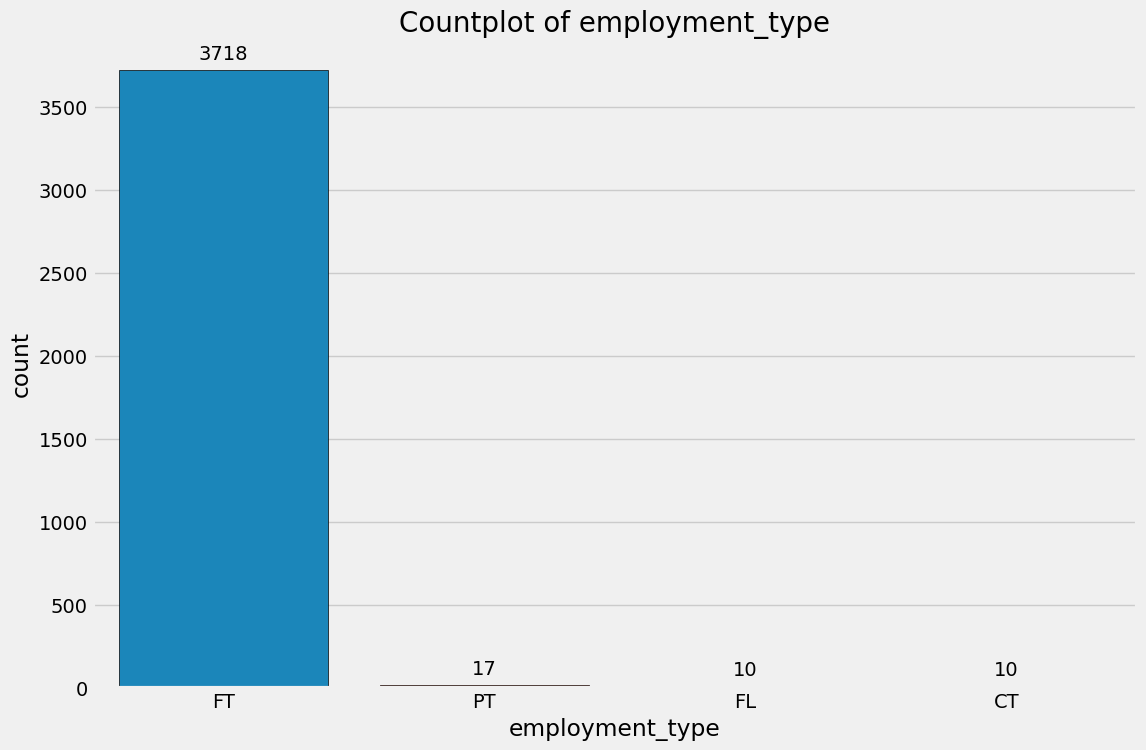

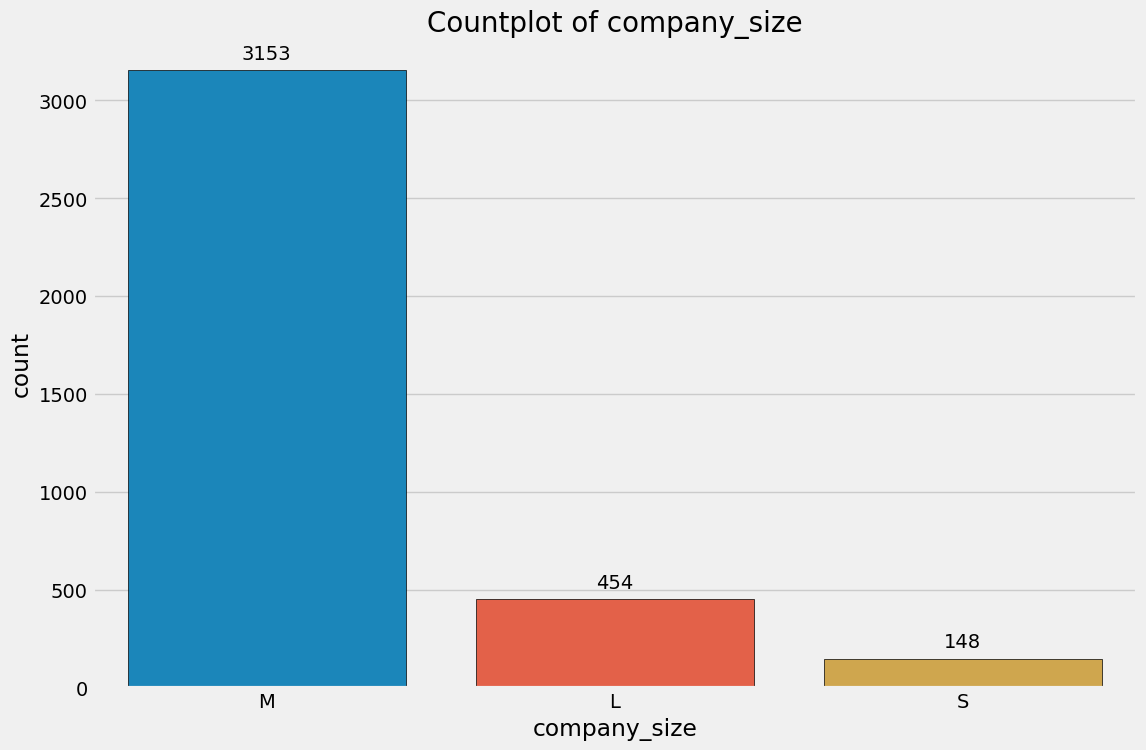

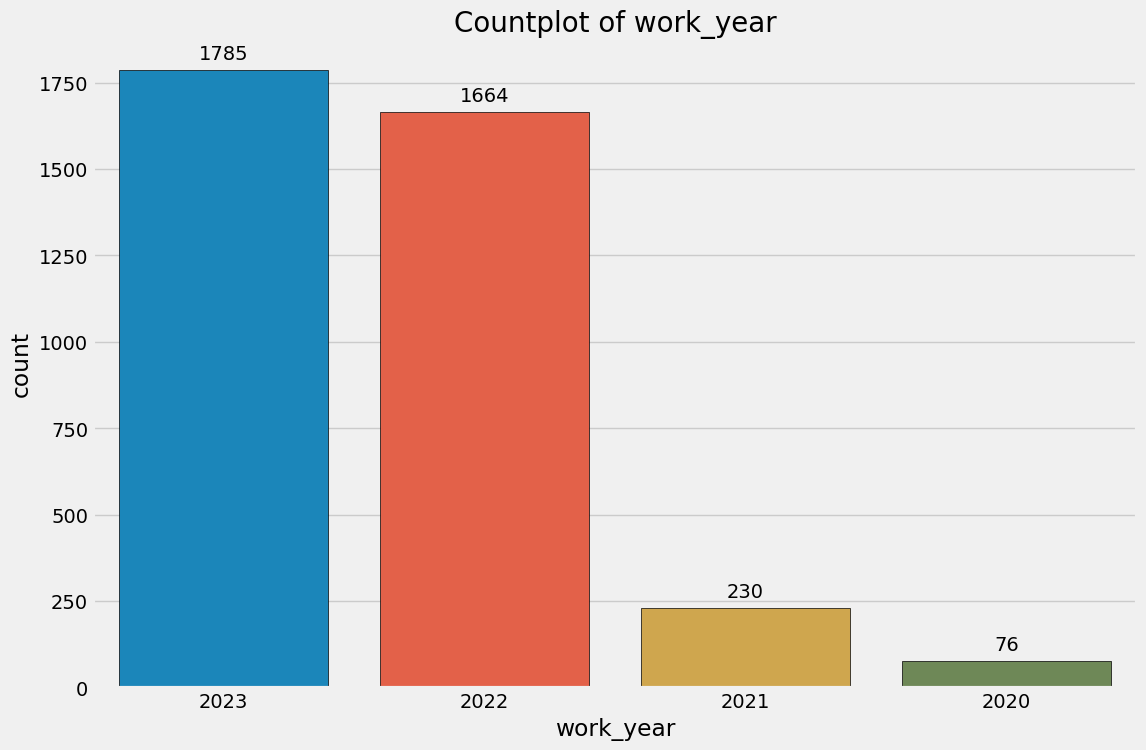

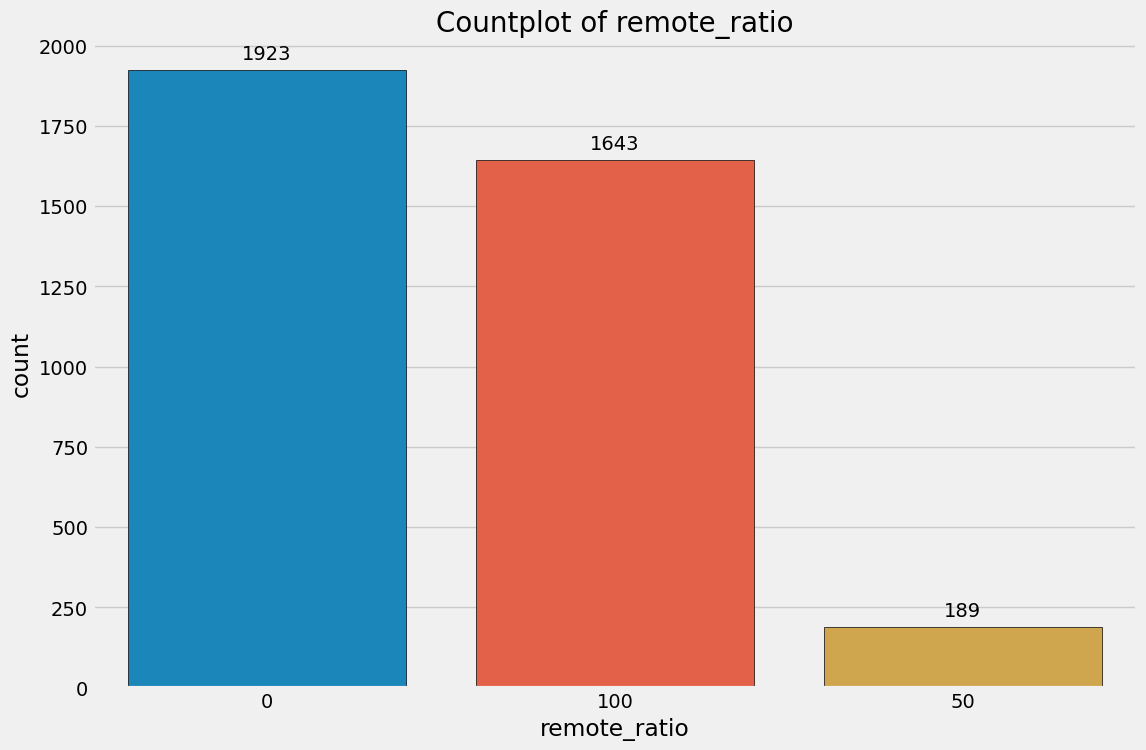

In [ ]:
#gives univariate analysis of each individual column
#allows us to not make any rash assumptions
fast_eda(df)

Fast EDA is a python module that provides a quick way to overview a DataFrame.It only takes up one line of code and its current package can output the head and tail of the dataframe, missing values count, MSNO Matrix, shape of dataframe, info(), describe(), correlation between variables, pairplot, histplot & boxplot subplot and countplots

In [ ]:
#describes data and shows total count for each rows, mean and standard deviation, and minimum and maximum for each column
df.describe()

work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000

I used describe() to provide a statistical sumary of the DataFrame to better understand the data. It helped me gain insight towards the percentile of the respective variables as well as the more standard information such as the minimum and maximum value and the mean.

In [ ]:
#finds duplicate values in the dataset and the sum of these values
df.duplicated().sum()

1171

In [ ]:
#unique() finds unique values of each column and outputs it
display(df['salary'].unique())
display(df['salary_in_usd'].unique())
display(df['salary_currency'].unique())
display(df['employment_type'].unique())
display(df['remote_ratio'].unique())
display(df['work_year'].unique())
display(df['company_size'].unique())
display(df['company_location'].unique())
display(df['job_title'].unique())
display(df['employee_residence'].unique())

array([   80000,    30000,    25500,   175000,   120000,   222200,
         136000,   219000,   141000,   147100,    90700,   130000,
         100000,   213660,   130760,   170000,   150000,   110000,
         275000,   174000,   230000,   143200,   225000,   156400,
         200000,    90000,    72000,   253200,   342810,   184590,
         162500,   105380,    64500,  1650000,   204620,   110680,
         270703,   221484,   212750,   185000,   262000,   245000,
         275300,   183500,   218500,   199098,   203300,   123600,
         189110,   139000,   258750,   231500,   166000,   172500,
         110500,   238000,   176000,   237000,   201450,   309400,
         159100,   115000,    81500,   280000,   210000,   280100,
         168100,   193500,   510000,    65000,   300000,   185900,
         129300,   140000,    45000,    36000,   105000,    70000,
         163196,   145885,   217000,   202800,   104300,   145000,
         165000,   132300,   179170,    94300,   152500,   116

array([ 85847,  30000,  25500, ...,  28369, 412000,  94665])

array(['EUR', 'USD', 'INR', 'HKD', 'CHF', 'GBP', 'AUD', 'SGD', 'CAD',
       'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK', 'DKK', 'JPY', 'MXN',
       'TRY', 'CLP'], dtype=object)

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

array([100,   0,  50])

array([2023, 2022, 2020, 2021])

array(['L', 'S', 'M'], dtype=object)

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

# **2. Data Visualisation**

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv("ds_salaries.csv")

# Generate the EDA report using the create_report function
report = create_report(df)

/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is depreca

DataPrep Report
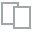
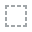
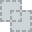
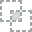
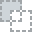
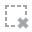
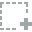
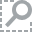
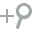
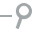
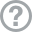
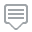
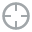
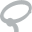
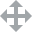
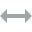
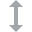
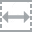
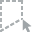
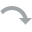
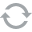
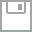
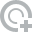
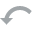
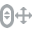
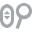
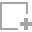
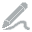
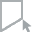
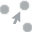
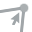
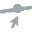

In [ ]:
#outputs the report generated above
report

In [ ]:
# Group the DataFrame by 'job_title' and calculate the average salary ('salary_in_usd')
# Then reset the index and sort the DataFrame by 'salary_in_usd' in ascending order
df=pd.read_csv('ds_salaries.csv')
df = df.groupby('job_title')['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd')

# Group the DataFrame by both 'job_title' and 'experience_level'
# Calculate the average salary ('salary_in_usd') for each group
# Then reset the index of the DataFrame
df=pd.read_csv('ds_salaries.csv')
df = df.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().reset_index()

# Sort the DataFrame by 'salary_in_usd' in descending order
df = df.sort_values('salary_in_usd', ascending=False)

# Print the DataFrame
df

job_title experience_level  salary_in_usd
174            Principal Data Scientist               EX  416000.000000
66                  Data Analytics Lead               SE  405000.000000
104              Data Science Tech Lead               SE  375000.000000
45                 Cloud Data Architect               SE  250000.000000
126                        Head of Data               EX  238183.333333
..                                  ...              ...            ...
162  Machine Learning Software Engineer               EN   10000.000000
180              Product Data Scientist               SE    8000.000000
24        Autonomous Vehicle Technician               EN    7000.000000
169                  Power BI Developer               EN    5409.000000
1         3D Computer Vision Researcher               MI    5409.000000

[192 rows x 3 columns]

In [ ]:
# Create a scatter plot using Plotly Express
# df is the DataFrame containing the data
# x is the column representing the job titles
# y is the column representing the salaries in USD
# size is the column representing the size of the markers (salary in USD)
# color is the column representing the experience level
# title is the title of the plot
fig = px.scatter(df, x='job_title', y='salary_in_usd', size='salary_in_usd',
                 color='experience_level', title='Job Title vs Salary in USD')

# Show the plot
fig.show()

In [ ]:
df= pd.read_csv('ds_salaries.csv')
group = df['employment_type'].value_counts()
emp_type = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']

fig = px.bar(x = emp_type, y = group.values,
       color = group.index, text = group.values,
       title = 'Employment Type Distribution')

fig.update_layout( xaxis_title = "Employment Type", yaxis_title = "count")
fig.show()

In [ ]:
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence'] = country
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    title = 'Employee Loaction On Map')
fig.show()

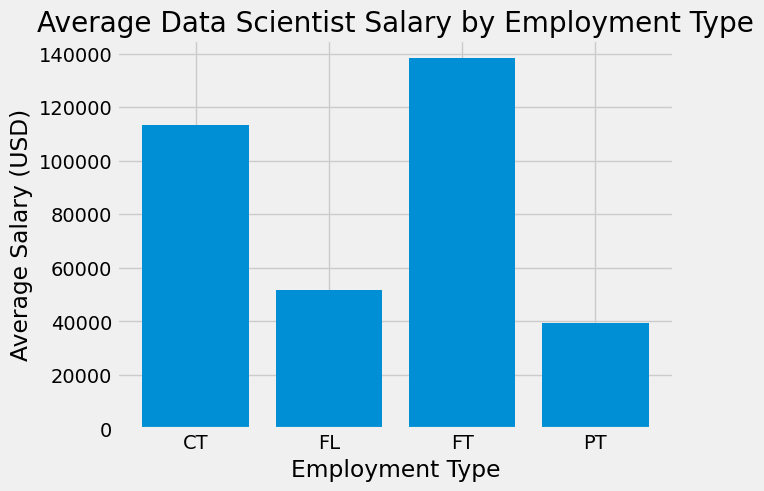

In [ ]:
# Group by employment type and calculate the average salary
salary_by_employment = df.groupby('employment_type')['salary_in_usd'].mean()

# Create a bar chart
plt.bar(salary_by_employment.index, salary_by_employment.values)

# Add axis labels and a title
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.title('Average Data Scientist Salary by Employment Type')

# Display the plot
plt.show()

In [ ]:
#copies data set and assigns it to variable df and groups the two columns 'job title' and 'employee residence'
# also calculates total number of distinct elements in each category of job and residence
data_frame = df.copy()
#groups Data Frame by job title and employee residence and counts occurences
grouped_df = data_frame.groupby(['job_title', 'employee_residence']).size().reset_index(name='count')
#sorts this data in descending order based on count and outputs it below
sorted_df = grouped_df.sort_values('count', ascending=False)
sorted_df

job_title employee_residence  count
166              Data Engineer                USA    903
234             Data Scientist                USA    667
123               Data Analyst                USA    519
321  Machine Learning Engineer                USA    218
139             Data Architect                USA     97
..                         ...                ...    ...
153              Data Engineer                ITA      1
154              Data Engineer                JPN      1
157              Data Engineer                MLT      1
160              Data Engineer                POL      1
381       Staff Data Scientist                USA      1

[382 rows x 3 columns]

In [ ]:
#generates sunburst chart using plotly express library and visualises hierarchial data in a circular form
sunburst_figure = px.sunburst(sorted_df, path=['employee_residence', 'job_title'], values='count')
sunburst_figure.show()

In [ ]:
#univariate analysis
#replaces values in 'experience_level' column with more clearly worded labels
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

#treemap will allow us to observe that the majority of the records entered are of people who are senior-level/expert level in the field of data science
#followed by entry level and executive at the end

#counts occurences of each experience level
ex_level = df['experience_level'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values,
                title = 'Experience Level')
#displays treemap figure
fig.show()

In [ ]:
df=pd.read_csv('ds_salaries.csv')
# also calculates total number of distinct elements in each category of job and residence
#groups Data Frame by remote ratio and salary in USD and counts occurences
df = df.groupby(['remote_ratio', 'salary_in_usd']).size().reset_index(name='count')
#sorts this data in descending order and outputs it below
df = df.sort_values('count', ascending=False)
df

remote_ratio  salary_in_usd  count
208              0         120000     61
310              0         150000     50
149              0         100000     49
1077           100         150000     47
333              0         160000     46
...            ...            ...    ...
601             50          54238      1
602             50          55000      1
603             50          55685      1
604             50          56256      1
1300           100         416000      1

[1301 rows x 3 columns]

In [ ]:
df=pd.read_csv('ds_salaries.csv')
#selects top 15 employee resdience locations
top_15_emp_locations=residence[:15]
#converts company locations to ISO3 country codes
country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = country
#count occurences of each company location
company_location = df['company_location'].value_counts()
top_15_company_location = company_location[:15]

#creates a figure with two bar charts
fig = go.Figure(data = [
    go.Bar(name = 'Employee Residence',
           x = top_15_emp_locations.index, y = top_15_emp_locations.values,
           text = top_15_emp_locations.values),
    go.Bar(name = 'Company Location', x = top_15_company_location.index,
           y = top_15_company_location.values, text = top_15_company_location.values)])

#updates layout of figure
fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title='Comparison of Employee Residence and Company Location')

#displays the graph
fig.show()

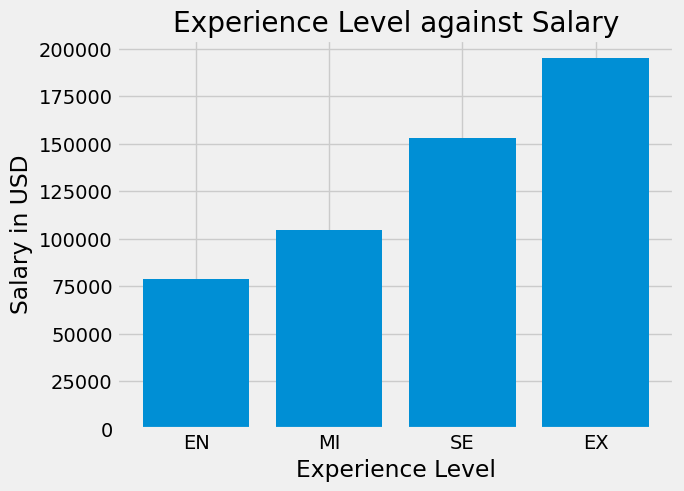

In [ ]:
total_EN = 0
total_MI = 0
total_SE = 0
total_EX = 0
count_EN = list(df['experience_level']).count('EN')
count_MI = list(df['experience_level']).count('MI')
count_SE = list(df['experience_level']).count('SE')
count_EX = list(df['experience_level']).count('EX')

for i in range(0, len(df)):
    if df['experience_level'][i] == 'EN':
        total_EN = total_EN + df['salary_in_usd'][i]
    elif df['experience_level'][i] == 'MI':
        total_MI = total_MI + df['salary_in_usd'][i]
    elif df['experience_level'][i] == 'SE':
        total_SE = total_SE + df['salary_in_usd'][i]
    elif df['experience_level'][i] == 'EX':
        total_EX = total_EX + df['salary_in_usd'][i]

avg_EN = total_EN / count_EN
avg_MI = total_MI / count_MI
avg_SE = total_SE / count_SE
avg_EX = total_EX / count_EX

x = ['EN', 'MI', 'SE', 'EX']
y = [avg_EN, avg_MI, avg_SE, avg_EX]

plt.bar(x, y)
plt.title('Experience Level against Salary')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


It is shown that as experience level incr3eases the average salary also increases. This is because your skill set as a data scientist would have increased the longer you spend in the industry.

In [ ]:
df=pd.read_csv('ds_salaries.csv')
list(df['experience_level']).count('EN')

320

<function matplotlib.pyplot.show(close=None, block=None)>

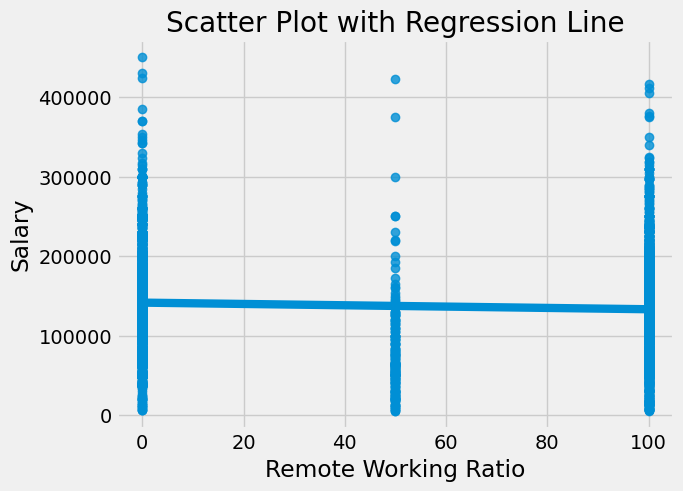

In [ ]:
#importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
#reading salary data from csv file
salary=pd.read_csv('ds_salaries.csv')
#creating scatter plot with regression line
sns.regplot(x='remote_ratio', y='salary_in_usd', data=salary)
#adds title to the plot
plt.title('Scatter Plot with Regression Line')
#labels x and y axis
plt.xlabel('Remote Working Ratio')
plt.ylabel('Salary')
#outputs completed plot
plt.show

In [ ]:
#rereads dataset to ensure the correct variables are assigned
df = pd.read_csv('ds_salaries.csv')
#caculates frequency of data in each respective category and displays this data using the name "count"
df = df.groupby(['job_title', 'company_size']).size().reset_index(name='count')
#sorts this data in descending order and outputs it
df = df.sort_values('count', ascending=False)
df

job_title company_size  count
71               Data Engineer            M    953
94              Data Scientist            M    713
55                Data Analyst            M    556
134  Machine Learning Engineer            M    234
11          Analytics Engineer            M    101
..                         ...          ...    ...
63         Data Analytics Lead            M      1
62         Data Analytics Lead            L      1
61     Data Analytics Engineer            S      1
58   Data Analytics Consultant            S      1
178       Staff Data Scientist            M      1

[179 rows x 3 columns]

In [ ]:
#visualises the data in the table above in a bar chart format
#job title and company size against frequency
fig = px.bar(df, x='job_title', y='count', color='company_size', title='Job Title Distribution by Company Size')
#displays chart
fig.show()

In [ ]:
#duplicates data set and assigns it to the variable "df"
df = pd.read_csv('ds_salaries.csv')
#groups column job title, company location and company size and calculate the combined salary of the respective groups of data
df = df.groupby(['job_title', 'company_location', 'company_size'])['salary_in_usd'].sum().reset_index()
#orders data in descending order and outputs data in a table
df = df.sort_values('salary_in_usd', ascending=False)
df

job_title company_location company_size  \
191                  Data Engineer               US            M   
284                 Data Scientist               US            M   
140                   Data Analyst               US            M   
388      Machine Learning Engineer               US            M   
158                 Data Architect               US            M   
..                             ...              ...          ...   
76               Big Data Engineer               CH            L   
211        Data Science Consultant               IN            M   
3    3D Computer Vision Researcher               IN            M   
422             Power BI Developer               IN            L   
418                   NLP Engineer               CZ            M   

     salary_in_usd  
191      130519817  
284       97814485  
140       58148376  
388       33911843  
158       14666591  
..             ...  
76            5882  
211           5707  
3             5409  
422           5409  
418           5132  

[463 rows x 4 columns]

In [ ]:
#creates treemap figure using data frame
#colour of each treemap is determined by values of 'salary_in_usd'
#the treemap is organised by 'company_location' and 'job_title

fig = px.treemap(df, path=['company_location', 'company_size', 'job_title'],
                 values='salary_in_usd', color='salary_in_usd')
#updates layout of figure to use a dark template
fig.update_layout(template='plotly_dark')
#displays treemap figure
fig.show()

In [ ]:
#calculates count of each work year in data frame
df=pd.read_csv('ds_salaries.csv')
work_year = df['work_year'].value_counts()
#creates pie chart using plotly express
fig = px.pie(values = work_year.values, names = work_year.index,
            title = 'Work year distribution')

fig.show()

In [ ]:
fig = px.box(y = df['salary_in_usd'], title = 'Salary in USD')
fig.show()

In [ ]:
import plotly.figure_factory as ff
hist_data = [df['salary_in_usd']]
group_labels = ['salary_in_usd']

fig = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig.update_layout(title = 'Distribution Plot of Salary in USD')
fig.show()


<Axes: xlabel='work_year', ylabel='remote_ratio'>

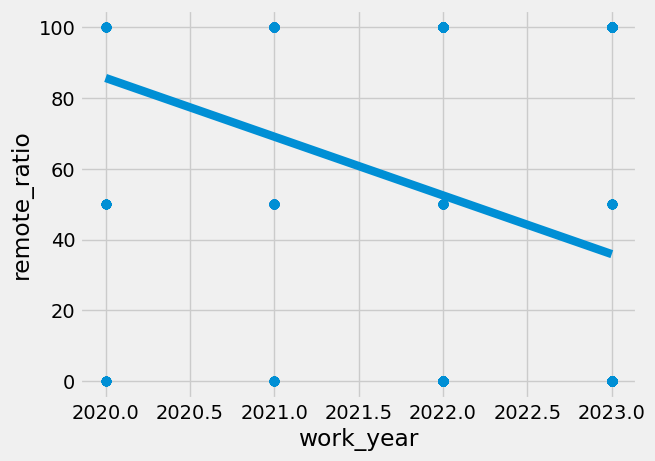

In [ ]:
import seaborn as sns
sns.regplot(x="work_year", y="remote_ratio", ci= None, data=df)

# **3. Data Wrangling**

In [ ]:
#renames columns for readability and practice
df=df.rename(columns={'work_year': 'Work Year',
                      'experience_level':'Experience Level',
                      'employment_type': 'Employment Type',
                      'job_title': 'Job Title',
                      'salary_in_usd': 'Salary (USD)',
                      'employee_residence': 'Country of Residence',
                      'remote_ratio': 'Remote Work (in %)',
                      'company_location': 'Company Location',
                      'company_size': 'Company Size'})
#'salary' and 'salary_currency' is irrelevant towards the analysis so we will drop it to simplify the dataset
df=df.drop(['salary', 'salary_currency'], axis=1)
#prints first five rows of data set following change
df.head()

Work Year Experience Level Employment Type                 Job Title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   Salary (USD) Country of Residence  Remote Work (in %) Company Location  \
0         85847                   ES                 100               ES   
1         30000                   US                 100               US   
2         25500                   US                 100               US   
3        175000                   CA                 100               CA   
4        120000                   CA                 100               CA   

  Company Size  
0            L  
1            S  
2            S  
3            M  
4            M

In [ ]:
# Prompt the user to choose between searching for integer data or text data
StrOrInt= str(input("Would you like to search for integer data or text data?"))
# If the user chooses to search for text data
if StrOrInt == "text":
# Prompt the user to enter the column they want to output
  category=str(input("Which category would you like to output?"))
#Prompt the user to enter the specific data they want to output
  data= str(input("which specific piece of data would you like to output?"))
# elif statement to provide solution for a different condition if the user chooses to search for integer data
elif StrOrInt == "integer":
# Prompt the user to enter the category they want to output
  category=str(input("Which category would you like to output?"))
# Prompt the user to enter the specific data they want to output
  data= int(input("which specific piece of data would you like to output?"))
# Group the DataFrame by the chosen category
grouped=df.groupby(category)
# Get the specific group that matches the chosen data
grouped.get_group(data)

Would you like to search for integer data or text data?integer
Which category would you like to output?Work Year
which specific piece of data would you like to output?2020


Work Year Experience Level Employment Type                  Job Title  \
183        2020               EX              FT         Staff Data Analyst   
2118       2020               MI              FT      Business Data Analyst   
3119       2020               EN              FT              Data Engineer   
3120       2020               EN              FT              Data Engineer   
3138       2020               EN              FT               Data Analyst   
...         ...              ...             ...                        ...   
3743       2020               MI              FT              Data Engineer   
3744       2020               SE              FT  Machine Learning Engineer   
3750       2020               SE              FT             Data Scientist   
3752       2020               EN              FT             Data Scientist   
3753       2020               EN              CT      Business Data Analyst   

      Salary (USD) Country of Residence  Remote Work (in %) Company Location  \
183          15000                   NG                   0               CA   
2118         95000                   US                   0               US   
3119         13493                   IN                 100               IN   
3120         13493                   IN                 100               IN   
3138         22809                   PT                 100               PT   
...            ...                  ...                 ...              ...   
3743        130800                   ES                 100               US   
3744         45618                   HR                 100               HR   
3750        412000                   US                 100               US   
3752        105000                   US                 100               US   
3753        100000                   US                 100               US   

     Company Size  
183             M  
2118            M  
3119            L  
3120            L  
3138            M  
...           ...  
3743            M  
3744            S  
3750            L  
3752            S  
3753            L  

[76 rows x 9 columns]

In [ ]:
#prompts user to input specific column that they want to access and output data from
columnSelect= str(input("Which specific column from the data set would you like to access and output?"))
#outputs data from that column
df[columnSelect]

Which specific column from the data set would you like to access and output?Company Location


0       ES
1       US
2       US
3       CA
4       CA
        ..
3750    US
3751    US
3752    US
3753    US
3754    IN
Name: Company Location, Length: 3755, dtype: object

In [ ]:
#prompts user to enter specific record they would like to access
specifcRow= int(input("Which specific record would you like to access?  Please enter as a number between 0-3755"))
#accesses specific row in data frame using the iloc() function and outputs the values in the row
df.iloc[specifcRow]

Which specific record would you like to access?  Please enter as a number between 0-3755888


Work Year                         2023
Experience Level                    MI
Employment Type                     FT
Job Title               Data Scientist
Salary (USD)                    150000
Country of Residence                US
Remote Work (in %)                 100
Company Location                    US
Company Size                         M
Name: 888, dtype: object

In [ ]:
#normalise 'salary_in_usd' column by dividing each value by maximum value
df['Salary (USD)']= df['Salary (USD)']/df['Salary (USD)'].max()
#displays scaled rows of 'salary_in_usd' column
print(df[["Salary (USD)"]])

      Salary (USD)
0         0.190771
1         0.066667
2         0.056667
3         0.388889
4         0.266667
...            ...
3750      0.915556
3751      0.335556
3752      0.233333
3753      0.222222
3754      0.210367

[3755 rows x 1 columns]


In [ ]:
#summary statistics for each numeric-type (int, float) for a python dataframe
df.describe()

Work Year  Salary (USD)  Remote Work (in %)
count  3755.000000   3755.000000         3755.000000
mean   2022.373635      0.305712           46.271638
std       0.691448      0.140124           48.589050
min    2020.000000      0.011404            0.000000
25%    2022.000000      0.211111            0.000000
50%    2022.000000      0.300000            0.000000
75%    2023.000000      0.388889          100.000000
max    2023.000000      1.000000          100.000000

In [ ]:
df.head()

Work Year Experience Level Employment Type                 Job Title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   Salary (USD) Country of Residence  Remote Work (in %) Company Location  \
0      0.190771                   ES                 100               ES   
1      0.066667                   US                 100               US   
2      0.056667                   US                 100               US   
3      0.388889                   CA                 100               CA   
4      0.266667                   CA                 100               CA   

  Company Size  
0            L  
1            S  
2            S  
3            M  
4            M

In [ ]:
df.columns

Index(['Work Year', 'Experience Level', 'Employment Type', 'Job Title',
       'Salary (USD)', 'Country of Residence', 'Remote Work (in %)',
       'Company Location', 'Company Size'],
      dtype='object')

In [ ]:
#describe() function used to generate descriptive statistics of ds_salaries dataset
#the exclude parameter has been set to ["0"] to exclude columns with object data type from the analysis to prevent NaN values from appearing
#only columns with integer data type has been show in this descriptive statistical analysis
df.describe(exclude=["O"])

Work Year  Salary (USD)  Remote Work (in %)
count  3755.000000   3755.000000         3755.000000
mean   2022.373635      0.305712           46.271638
std       0.691448      0.140124           48.589050
min    2020.000000      0.011404            0.000000
25%    2022.000000      0.211111            0.000000
50%    2022.000000      0.300000            0.000000
75%    2023.000000      0.388889          100.000000
max    2023.000000      1.000000          100.000000

In [ ]:
#this confirms that there are no duplicate records after deleting the two irrelevant columns
print(df.duplicated().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3750    False
3751    False
3752    False
3753    False
3754    False
Length: 3755, dtype: bool>


# **4. Feature Engineering**

In [ ]:
# Select only the numerical columns for scaling
numeric_columns = df.select_dtypes(include=[np.number]).columns

scaler = MinMaxScaler()
dfscaled = scaler.fit_transform(df[numeric_columns])
dfscaled = pd.DataFrame(dfscaled, columns=numeric_columns)

dfscaled.head()

Work Year  Salary (USD)  Remote Work (in %)
0        1.0      0.181436                 1.0
1        1.0      0.055900                 1.0
2        1.0      0.045784                 1.0
3        1.0      0.381839                 1.0
4        1.0      0.258207                 1.0

In [ ]:
#converts 'remote_ratio' column to integer type
df['Remote Work (in %)'] = df['Remote Work (in %)'].astype(int)
#initialise OneHotEncoder object with auto categories
encoder = OneHotEncoder(categories='auto')
#encodes 'remote_ratio' column and creates a data frame
df_encoded = pd.DataFrame(encoder.fit_transform(df[['Remote Work (in %)']]).toarray())
#concatenates original data frame and encoded data frame
df=pd.concat([df, df_encoded], axis=1)
#displays final data frame with one-hot encoded 'remote_ratio' column
df

Work Year Experience Level Employment Type                 Job Title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

      Salary (USD) Country of Residence  Remote Work (in %) Company Location  \
0         0.190771                   ES                 100               ES   
1         0.066667                   US                 100               US   
2         0.056667                   US                 100               US   
3         0.388889                   CA                 100               CA   
4         0.266667                   CA                 100               CA   
...            ...                  ...                 ...              ...   
3750      0.915556                   US                 100               US   
3751      0.335556                   US                 100               US   
3752      0.233333                   US                 100               US   
3753      0.222222                   US                 100               US   
3754      0.210367                   IN                  50               IN   

     Company Size    0    1    2  
0               L  0.0  0.0  1.0  
1               S  0.0  0.0  1.0  
2               S  0.0  0.0  1.0  
3               M  0.0  0.0  1.0  
4               M  0.0  0.0  1.0  
...           ...  ...  ...  ...  
3750            L  0.0  0.0  1.0  
3751            L  0.0  0.0  1.0  
3752            S  0.0  0.0  1.0  
3753            L  0.0  0.0  1.0  
3754            L  0.0  1.0  0.0  

[3755 rows x 12 columns]

In [ ]:
#creates a CountVectorizer object to encode categorical features
encoder=CountVectorizer()
#Create a OneHotEncoder object to encode categorical feature
encoder = OneHotEncoder(categories='auto')
#apply the OneHotEncoder to the specified columns in the DataFrame and convert the result to an array
feature_arr = encoder.fit_transform(df[['Company Size','Employment Type','Remote Work (in %)', 'Work Year']]).toarray()
#Get the feature labels generated by the OneHotEncoder
feature_labels = encoder.get_feature_names_out(['Company Size', 'Employment Type', 'Remote Work (in %)', 'Work Year'])

#Create a DataFrame with the encoded features and using the feature labels as column names
features = pd.DataFrame(feature_arr, columns=feature_labels)
#Print the resulting DataFrame with the encoded features
features

Company Size_L  Company Size_M  Company Size_S  Employment Type_CT  \
0                1.0             0.0             0.0                 0.0   
1                0.0             0.0             1.0                 1.0   
2                0.0             0.0             1.0                 1.0   
3                0.0             1.0             0.0                 0.0   
4                0.0             1.0             0.0                 0.0   
...              ...             ...             ...                 ...   
3750             1.0             0.0             0.0                 0.0   
3751             1.0             0.0             0.0                 0.0   
3752             0.0             0.0             1.0                 0.0   
3753             1.0             0.0             0.0                 1.0   
3754             1.0             0.0             0.0                 0.0   

      Employment Type_FL  Employment Type_FT  Employment Type_PT  \
0                    0.0                 1.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 1.0                 0.0   
4                    0.0                 1.0                 0.0   
...                  ...                 ...                 ...   
3750                 0.0                 1.0                 0.0   
3751                 0.0                 1.0                 0.0   
3752                 0.0                 1.0                 0.0   
3753                 0.0                 0.0                 0.0   
3754                 0.0                 1.0                 0.0   

      Remote Work (in %)_0  Remote Work (in %)_50  Remote Work (in %)_100  \
0                      0.0                    0.0                     1.0   
1                      0.0                    0.0                     1.0   
2                      0.0                    0.0                     1.0   
3                      0.0                    0.0                     1.0   
4                      0.0                    0.0                     1.0   
...                    ...                    ...                     ...   
3750                   0.0                    0.0                     1.0   
3751                   0.0                    0.0                     1.0   
3752                   0.0                    0.0                     1.0   
3753                   0.0                    0.0                     1.0   
3754                   0.0                    1.0                     0.0   

      Work Year_2020  Work Year_2021  Work Year_2022  Work Year_2023  
0                0.0             0.0             0.0             1.0  
1                0.0             0.0             0.0             1.0  
2                0.0             0.0             0.0             1.0  
3                0.0             0.0             0.0             1.0  
4                0.0             0.0             0.0             1.0  
...              ...             ...             ...             ...  
3750             1.0             0.0             0.0             0.0  
3751             0.0             1.0             0.0             0.0  
3752             1.0             0.0             0.0             0.0  
3753             1.0             0.0             0.0             0.0  
3754             0.0             1.0             0.0             0.0  

[3755 rows x 14 columns]

In [ ]:
#calculates number of unique values in each column of the data frame
unique_values = df.nunique()
#displays the reuslt which is a series object containing the number of unique values in each column
unique_values

Work Year                  4
Experience Level           4
Employment Type            4
Job Title                 93
Salary (USD)            1035
Country of Residence      78
Remote Work (in %)         3
Company Location          72
Company Size               3
0                          2
1                          2
2                          2
dtype: int64

In [ ]:
df.shape

(3755, 12)

In [ ]:
df

Work Year Experience Level Employment Type                 Job Title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

      Salary (USD) Country of Residence  Remote Work (in %) Company Location  \
0         0.190771                   ES                 100               ES   
1         0.066667                   US                 100               US   
2         0.056667                   US                 100               US   
3         0.388889                   CA                 100               CA   
4         0.266667                   CA                 100               CA   
...            ...                  ...                 ...              ...   
3750      0.915556                   US                 100               US   
3751      0.335556                   US                 100               US   
3752      0.233333                   US                 100               US   
3753      0.222222                   US                 100               US   
3754      0.210367                   IN                  50               IN   

     Company Size    0    1    2  
0               L  0.0  0.0  1.0  
1               S  0.0  0.0  1.0  
2               S  0.0  0.0  1.0  
3               M  0.0  0.0  1.0  
4               M  0.0  0.0  1.0  
...           ...  ...  ...  ...  
3750            L  0.0  0.0  1.0  
3751            L  0.0  0.0  1.0  
3752            S  0.0  0.0  1.0  
3753            L  0.0  0.0  1.0  
3754            L  0.0  1.0  0.0  

[3755 rows x 12 columns]

# ML Models

In [ ]:
#deletes columns that don't have the int64 data type
non_int=[]
for col in df:
  if df[col].dtypes !="int64":
    non_int.append(col)
integers=df.drop(columns=non_int)
integers

Work Year  Remote Work (in %)
0          2023                 100
1          2023                 100
2          2023                 100
3          2023                 100
4          2023                 100
...         ...                 ...
3750       2020                 100
3751       2021                 100
3752       2020                 100
3753       2020                 100
3754       2021                  50

[3755 rows x 2 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Work Year             3755 non-null   int64  
 1   Experience Level      3755 non-null   object 
 2   Employment Type       3755 non-null   object 
 3   Job Title             3755 non-null   object 
 4   Salary (USD)          3755 non-null   float64
 5   Country of Residence  3755 non-null   object 
 6   Remote Work (in %)    3755 non-null   int64  
 7   Company Location      3755 non-null   object 
 8   Company Size          3755 non-null   object 
 9   0                     3755 non-null   float64
 10  1                     3755 non-null   float64
 11  2                     3755 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 352.2+ KB


In [ ]:
from sklearn.linear_model import LinearRegression

#create linear regression model
model = LinearRegression()

x = df["Work Year"].values.reshape(-1, 1)  # Reshape to 2D array with 1 column
y = df["Salary (USD)"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# predict the target variable on the training set
y_pred = model.predict(x_train)

# calculate the evaluation metrics using the predicted and true training variables
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

#makes predictions on testing set
y_linear_pred=model.predict(x_test)

# print the results
print("R-squared score: ", r2)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

# Print the evaluation metrics
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_linear_pred))
print("R-squared Score:", metrics.r2_score(y_test, y_linear_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_linear_pred))


R-squared score:  0.053138200984185535
Mean Squared Error:  0.018612566577475394
Mean Absolute Error:  0.10613714090263761
Mean Squared Error: 0.0185916752154582
R-squared Score: 0.04634887163135193
Mean Absolute Error: 0.10717963232483059


In [ ]:
from sklearn import datasets
x=pd.DataFrame(data=features, columns=list(features))
y=features.index
x.head()

Company Size_L  Company Size_M  Company Size_S  Employment Type_CT  \
0             1.0             0.0             0.0                 0.0   
1             0.0             0.0             1.0                 1.0   
2             0.0             0.0             1.0                 1.0   
3             0.0             1.0             0.0                 0.0   
4             0.0             1.0             0.0                 0.0   

   Employment Type_FL  Employment Type_FT  Employment Type_PT  \
0                 0.0                 1.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 1.0                 0.0   
4                 0.0                 1.0                 0.0   

   Remote Work (in %)_0  Remote Work (in %)_50  Remote Work (in %)_100  \
0                   0.0                    0.0                     1.0   
1                   0.0                    0.0                     1.0   
2                   0.0                    0.0                     1.0   
3                   0.0                    0.0                     1.0   
4                   0.0                    0.0                     1.0   

   Work Year_2020  Work Year_2021  Work Year_2022  Work Year_2023  
0             0.0             0.0             0.0             1.0  
1             0.0             0.0             0.0             1.0  
2             0.0             0.0             0.0             1.0  
3             0.0             0.0             0.0             1.0  
4             0.0             0.0             0.0             1.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

#predicts mean value of target variable
dummy_reg=DummyRegressor(strategy='mean')
dummy_reg.fit(x_train, y_train)

DummyRegressor()

In [ ]:
#makes predictions on training set
y_pred=dummy_reg.predict(x_train)
#makes predictions on testing set
y_dummy_pred= dummy_reg.predict(x_test)

mse_train=mean_squared_error(y_train, y_pred)
mae_train= mean_absolute_error(y_train, y_pred)
r2_train=r2_score(y_train, y_pred)
print("Dummy MSE:", mse_train)
print("Mean Absolute Error: ", mae_train)
print("R-squared score: ", r2_train)

#testing set evaluation calculations
mse_test=mean_squared_error(y_test, y_dummy_pred)
mae_test=mean_absolute_error(y_test, y_dummy_pred)
r2_test=r2_score(y_test, y_dummy_pred)
print("MSE: ", mse_test)
print("MAE: ", mae_test)
print("R2: ", r2_test)

Dummy MSE: 1165903.2282176805
Mean Absolute Error:  934.4569087643462
R-squared score:  0.0
MSE:  1212967.6171460687
MAE:  956.3405490415797
R2:  -0.006516100370985711


In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred= lin_reg.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
lin_rmse=np.sqrt(mse)
print("Linear Regression RMSE", lin_rmse)

Linear Regression RMSE 528.6840470179126


In [ ]:
df.sample(5, random_state=44)

Work Year Experience Level Employment Type          Job Title  \
1879       2022               SE              FT       Data Analyst   
418        2023               SE              FT     Data Scientist   
366        2023               MI              FT       Data Analyst   
516        2023               EN              FT  Research Engineer   
2139       2022               SE              FT     Data Scientist   

      Salary (USD) Country of Residence  Remote Work (in %) Company Location  \
1879      0.264444                   US                 100               US   
418       0.322222                   US                 100               US   
366       0.166667                   US                   0               US   
516       0.266667                   US                   0               US   
2139      0.105067                   ES                   0               ES   

     Company Size    0    1    2  
1879            M  0.0  0.0  1.0  
418             M  0.0  0.0  1.0  
366             M  1.0  0.0  0.0  
516             M  1.0  0.0  0.0  
2139            M  1.0  0.0  0.0

In [ ]:
df=df.dropna()

In [ ]:
# convert the 'Salary (USD)' column to an integer column
df['Salary (USD)'] = df['Salary (USD)'].astype(int)

# print the updated dataset
print(df)

      Work Year Experience Level Employment Type                 Job Title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

      Salary (USD) Country of Residence  Remote Work (in %) Com

In [ ]:
df.columns

Index([           'Work Year',     'Experience Level',      'Employment Type',
                  'Job Title',         'Salary (USD)', 'Country of Residence',
         'Remote Work (in %)',     'Company Location',         'Company Size',
                            0,                      1,                      2],
      dtype='object')

In [ ]:
df.describe()

Work Year  Salary (USD)  Remote Work (in %)            0  \
count  3755.000000   3755.000000         3755.000000  3755.000000   
mean   2022.373635      0.000266           46.271638     0.512117   
std       0.691448      0.016319           48.589050     0.499920   
min    2020.000000      0.000000            0.000000     0.000000   
25%    2022.000000      0.000000            0.000000     0.000000   
50%    2022.000000      0.000000            0.000000     1.000000   
75%    2023.000000      0.000000          100.000000     1.000000   
max    2023.000000      1.000000          100.000000     1.000000   

                 1            2  
count  3755.000000  3755.000000  
mean      0.050333     0.437550  
std       0.218660     0.496151  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     1.000000  
max       1.000000     1.000000

In [ ]:
#defines and initialises array
salary_range= [ ]

#for loop to go through each record
for i in range (0, len(df)):
  #if statement to determine which category the salary falls into
  if df['Salary (USD)'][i]<95000:
    #adds salary category to the list
    salary_range.append('L')
  elif df['Salary (USD)'][i]>=95000 and df['Salary (USD)'][i]< 135000:
    salary_range.append('ML')
  elif df['Salary (USD)'][i]>= 135000 and df['Salary (USD)'][i]<175000:
    salary_range.append('MH')
  elif df['Salary (USD)'][i]>=175000:
    salary_range.append('H')

#assigns data in the array to a new column in the data set called 'Salary Category'
df['Salary Category']=salary_range
df

Work Year Experience Level Employment Type                 Job Title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

      Salary (USD) Country of Residence  Remote Work (in %) Company Location  \
0            85847                   ES                 100               ES   
1            30000                   US                 100               US   
2            25500                   US                 100               US   
3           175000                   CA                 100               CA   
4           120000                   CA                 100               CA   
...            ...                  ...                 ...              ...   
3750        412000                   US                 100               US   
3751        151000                   US                 100               US   
3752        105000                   US                 100               US   
3753        100000                   US                 100               US   
3754         94665                   IN                  50               IN   

     Company Size Salary Category  
0               L               L  
1               S               L  
2               S               L  
3               M               H  
4               M              ML  
...           ...             ...  
3750            L               H  
3751            L              MH  
3752            S              ML  
3753            L              ML  
3754            L               L  

[3755 rows x 10 columns]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Drop columns that are not needed for training the model including target variable
x = df.drop(["Employment Type", "Job Title", "Country of Residence", "Company Location", "Company Size", "Experience Level","Salary Category"], axis=1)

# Set the target variable to be predicted
y = df["Salary Category"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=44)

# Convert column names to string
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

# Create a random forest classifier with 50 trees
rf_model= RandomForestClassifier(n_estimators=50, max_features="sqrt", random_state=44)

# Train the random forest model on the training set
rf_model.fit(x_train, y_train)

# Use the trained model to predict the target variable on the test set
y_pred = rf_model.predict(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Drop columns that are not needed for training the model including target variable
x = df.drop(["Employment Type", "Job Title", "Country of Residence", "Company Location", "Company Size", "Experience Level","Salary Category"], axis=1)

# Set the target variable to be predicted and encode it as numeric labels
le = LabelEncoder()
y = le.fit_transform(df["Salary Category"])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=44)

# Convert column names to string
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

# Create a random forest classifier with 50 trees
rf_model= RandomForestClassifier(n_estimators=50, max_features="sqrt", random_state=44)

# Train the random forest model on the training set
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=44)

In [ ]:
# Use the trained model to predict the target variable on the test set
y_pred = rf_model.predict(x_test)

y_rand_pred= rf_model.predict(x_train)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_train= mean_squared_error(y_train, y_rand_pred)
mae_train= mean_absolute_error(y_train, y_rand_pred)
r2_train= r2_score(y_train, y_rand_pred)
# Print evaluation metrics on testing set
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

#evaluation metrics on training set
print("MSE: ", mse_train)
print("MAE: ", mae_train)
print("R2: ", r2_train)

MSE: 0.0008873114463176575
MAE: 0.0008873114463176575
R2: 0.9993031501077737
MSE:  0.0
MAE:  0.0
R2:  1.0


In [ ]:
from sklearn.metrics import accuracy_score

# Predict the classes of the test set
y_pred = rf_model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("The accuracy of the Random Forest Classifier is: ", accuracy)

The accuracy of the Random Forest Classifier is:  1.0


In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#predicts class probabilities for test set
rf_model.predict_proba(x_test)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
#creates variable to judge importance of different variables towards salary range
importances=rf_model.feature_importances_
columns=x.columns
i=0
while i< len(columns):
  print(f"the importance of feature '{columns[i]}' is {round(importances[i] *100, 2)}%.")
  i += 1

#from this code we can draw to the conclusion that 'salary_in_usd' has a 89% predicting power in a person's salary category and plays the biggest role towards predicting it

the importance of feature 'Work Year' is 0.0%.
the importance of feature 'Salary (USD)' is 0.0%.
the importance of feature 'Remote Work (in %)' is 0.0%.
the importance of feature '0' is 0.0%.
the importance of feature '1' is 0.0%.
the importance of feature '2' is 0.0%.


In [ ]:
x

Work Year  Salary (USD)  Remote Work (in %)    0    1    2
0          2023             0                 100  0.0  0.0  1.0
1          2023             0                 100  0.0  0.0  1.0
2          2023             0                 100  0.0  0.0  1.0
3          2023             0                 100  0.0  0.0  1.0
4          2023             0                 100  0.0  0.0  1.0
...         ...           ...                 ...  ...  ...  ...
3750       2020             0                 100  0.0  0.0  1.0
3751       2021             0                 100  0.0  0.0  1.0
3752       2020             0                 100  0.0  0.0  1.0
3753       2020             0                 100  0.0  0.0  1.0
3754       2021             0                  50  0.0  1.0  0.0

[3755 rows x 6 columns]

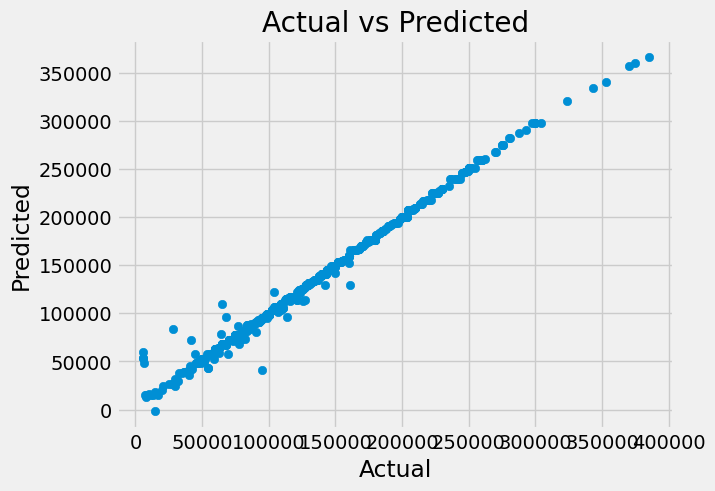

Mean Squared Error 0.0008873114463176575
Mean Absolute Error 0.0008873114463176575
R-Squared Score 0.9993031501077737
MSE:  17467958.370465815
MAE:  1790.9628006946698
R2:  0.9956116884611012


In [ ]:
#imports necessary libraries needed for GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#creates a function to create scatter graph and calculate mse, mae and r2 score for model evaluation
def regression_report (y_true, y_pred, y_train, y_grad_pred):
  mse_test= mean_squared_error (y_true, y_pred)
  mae_test = mean_absolute_error (y_true, y_pred)
  r2_test= r2_score(y_true, y_pred)

  mse_train=mean_squared_error(y_train, y_grad_pred)
  mae_train=mean_absolute_error(y_train, y_grad_pred)
  r2_train= r2_score(y_train, y_grad_pred)

  plt.scatter(y_true, y_pred)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Actual vs Predicted')
  plt.show()

  print('Mean Squared Error', mse)
  print('Mean Absolute Error', mae)
  print('R-Squared Score', r2)
  print('MSE: ', mse_train)
  print('MAE: ', mae_train)
  print('R2: ', r2_train)

#re-reads data frame for clarity
df=pd.read_csv('ds_salaries.csv')

#uses .get_dummies() to encode and convert catgorical variables into binary format for better accuracy of ML model
df_encoded=pd.get_dummies(df)

#drops input variable to be tested
x= df_encoded.drop('salary_in_usd', axis=1)
y=df_encoded['salary_in_usd']

#splits data into training and testing sets
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state= 42)

#assigns the ML model function to the variable model
#this is done to create and to train the model
model=GradientBoostingRegressor()
model.fit(x_train, y_train)

#makes predictions on test set
y_pred=model.predict(x_test)
y_grad_pred=model.predict(x_train)

#pre defined regression_report() function to output scatter graph and evaluate model
regression_report(y_test, y_pred, y_train, y_grad_pred)

In [ ]:
df_encoded

work_year   salary  salary_in_usd  remote_ratio  experience_level_EN  \
0          2023    80000          85847           100                    0   
1          2023    30000          30000           100                    0   
2          2023    25500          25500           100                    0   
3          2023   175000         175000           100                    0   
4          2023   120000         120000           100                    0   
...         ...      ...            ...           ...                  ...   
3750       2020   412000         412000           100                    0   
3751       2021   151000         151000           100                    0   
3752       2020   105000         105000           100                    1   
3753       2020   100000         100000           100                    1   
3754       2021  7000000          94665            50                    0   

      experience_level_EX  experience_level_MI  experience_level_SE  \
0                       0                    0                    1   
1                       0                    1                    0   
2                       0                    1                    0   
3                       0                    0                    1   
4                       0                    0                    1   
...                   ...                  ...                  ...   
3750                    0                    0                    1   
3751                    0                    1                    0   
3752                    0                    0                    0   
3753                    0                    0                    0   
3754                    0                    0                    1   

      employment_type_CT  employment_type_FL  employment_type_FT  \
0                      0                   0                   1   
1                      1                   0                   0   
2                      1                   0                   0   
3                      0                   0                   1   
4                      0                   0                   1   
...                  ...                 ...                 ...   
3750                   0                   0                   1   
3751                   0                   0                   1   
3752                   0                   0                   1   
3753                   1                   0                   0   
3754                   0                   0                   1   

      employment_type_PT  job_title_3D Computer Vision Researcher  \
0                      0                                        0   
1                      0                                        0   
2                      0                                        0   
3                      0                                        0   
4                      0                                        0   
...                  ...                                      ...   
3750                   0                                        0   
3751                   0                                        0   
3752                   0                                        0   
3753                   0                                        0   
3754                   0                                        0   

      job_title_AI Developer  job_title_AI Programmer  job_title_AI Scientist  \
0                          0                        0                       0   
1                          0                        0                       0   
2                          0                        0                       0   
3                          0                        0                       0   
4                          0                        0                       0   
...                      ...                      ...                     ...   
375

R-squared:  0.9562672175943756
MAE:  1229.6753293785368
MSE:  172647833.85646322
R2:  0.9999533878242057
MSE:  185542.78544564746
MAE:  289.87025014823985


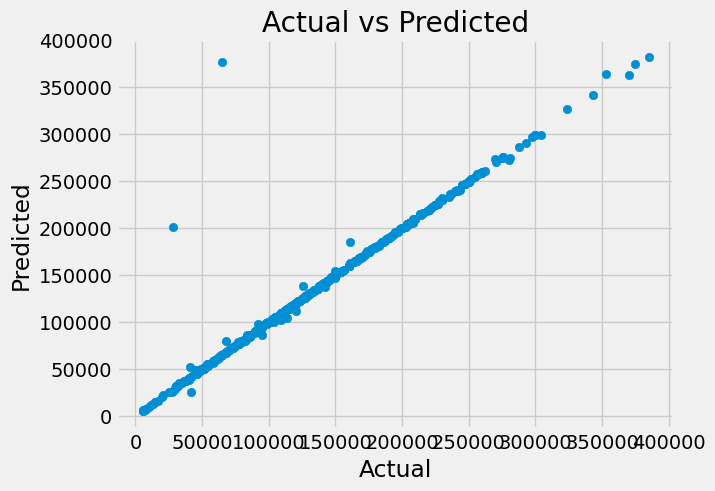

None

In [ ]:
# Import the necessary libraries
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder

df= pd.read_csv('ds_salaries.csv')

#encodes data using .get_dummies() to suit ML model
df_encoded=pd.get_dummies(df)
x= df_encoded.drop('salary_in_usd', axis=1)
y=df_encoded['salary_in_usd']

#splits data into testing and training sets
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state= 42)

# Train the XGBRegressor model
model = XGBRegressor()
model.fit(x_train, y_train)

# Make predictions on the test set and training set
y_pred = model.predict(x_test)
y_train_pred= model.predict(x_train)

# Calculates evaluation metrics for test set
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
#calculates evaluation metrics for training set
r2_train= r2_score(y_train, y_train_pred)
mse_train=mean_squared_error(y_train, y_train_pred)
mae_train= mean_absolute_error(y_train, y_train_pred)

# Print the results
print("R-squared: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("R2: ", r2_train)
print("MSE: ", mse_train)
print("MAE: ", mae_train)

#creates scatter graph of actal testing data of target variable versus predictions on the testing set
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
display(plt.show())